In [26]:
import numpy as np
import networkx as nx
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import procrustes
from sklearn import preprocessing
import random

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
G = nx.karate_club_graph()

walks =[]
for i in range(10):
    for node in G.nodes():
        walk = [node]
        next_node = node
        for j in range(10):
            next_node = random.choice(G.neighbors(next_node))
            walk.append(next_node)
        walks.append(walk)

walks = [map(str, walk) for walk in walks]

In [15]:
walksA = np.random.permutation(walks)
walksB = np.random.permutation(walks)

modelA = Word2Vec(walksA.tolist(), size=2, window=10, min_count=0, sg=1, workers=8, iter=50)
modelB = Word2Vec(walksB.tolist(), size=2, window=10, min_count=0, sg=1, workers=8, iter=50)

w_a = np.asarray([modelA[str(node)] for node in G.nodes()])
w_b = np.asarray([modelB[str(node)] for node in G.nodes()])

In [16]:
def plot_w(a,b):
    plt.scatter(a[:,0], a[:,1])
    plt.scatter(b[:,0], b[:,1]) 

## Raw plot

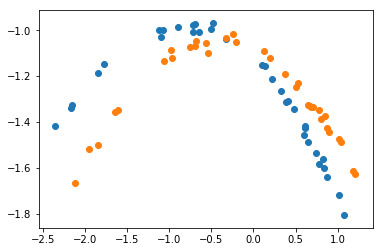

In [17]:
plot_w(w_a, w_b)

# Mean distanced

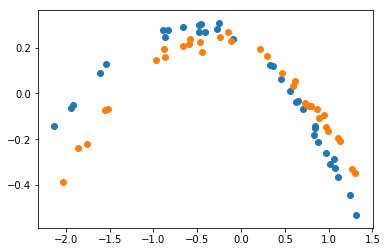

In [18]:
plot_w(w_a - w_a.mean(0), w_b - w_b.mean(0))

## Procrustes align from histwords

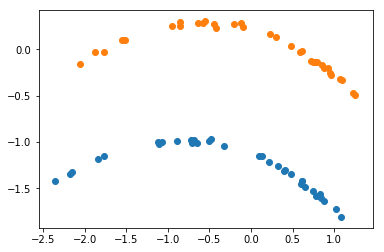

In [19]:
def procrustes_align(base_embed, other_embed):
    """ 
        Align other embedding to base embeddings via Procrustes.
        Returns best distance-preserving aligned version of other_embed
        NOTE: Assumes indices are aligned
    """
    basevecs = base_embed - base_embed.mean(0)
    othervecs = other_embed - other_embed.mean(0)
    m = othervecs.T.dot(basevecs)
    u, _, v = np.linalg.svd(m) 
    ortho = u.dot(v)
    fixedvecs = othervecs.dot(ortho)
    return fixedvecs

w_b_alligned = procrustes_align(w_a, w_b)
plot_w(w_a, w_b_alligned)

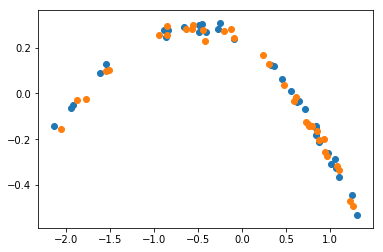

In [20]:
plot_w(w_a-w_a.mean(0), w_b_alligned - w_b_alligned.mean(0))

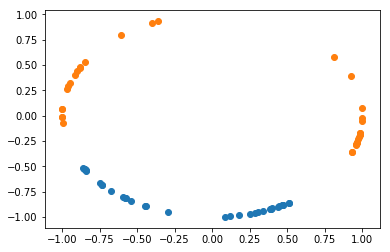

In [21]:
plot_w(preprocessing.normalize(w_a), preprocessing.normalize(w_b_alligned))

## [scipy.spatial.procrustes](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.spatial.procrustes.html)

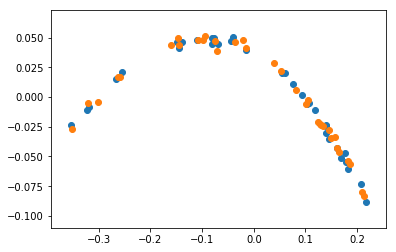

In [22]:
a,b,_ = procrustes(w_a, w_b)
plt.scatter(a[:,0], a[:,1])
plt.scatter(b[:,0], b[:,1])

## [scipy.linalg.orthogonal_procrustes](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.orthogonal_procrustes.html#id2)

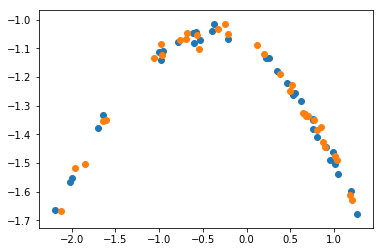

In [23]:
r, _ = orthogonal_procrustes(w_a, w_b)

w_a_alligned = w_a.dot(r)
plot_w(w_a_alligned, w_b)

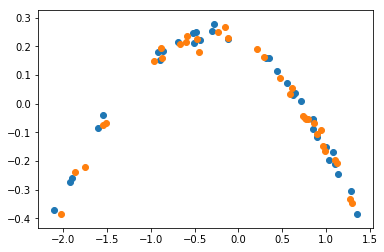

In [24]:
plot_w(w_a_alligned - w_a_alligned.mean(0), w_b - w_b.mean(0))

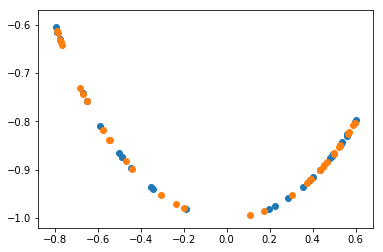

In [25]:
plot_w(preprocessing.normalize(w_a_alligned), preprocessing.normalize(w_b))